In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/Heart (2).csv')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


mapping the names to numbers

In [ ]:
df.value_counts('ChestPain')

,count
ChestPain,
asymptomatic,144
nonanginal,86
nontypical,50
typical,23


In [ ]:
df.value_counts('Thal')

,count
Thal,
normal,166
reversable,117
fixed,18


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['ChestPain', 'Thal', 'AHD']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    int64  
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    int64  
 13  AHD        297 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 34.8 KB


In [ ]:
df1=df.copy()

In [ ]:
df1.drop('AHD', axis=1, inplace=True)

In [ ]:
correlation_matrix = df1.corr()
print(correlation_matrix)



                Age       Sex  ChestPain    RestBP      Chol       Fbs  \
Age        1.000000 -0.092399  -0.110471  0.290476  0.202644  0.132062   
Sex       -0.092399  1.000000  -0.008908 -0.066340 -0.198089  0.038850   
ChestPain -0.110471 -0.008908   1.000000  0.036980 -0.072088  0.057663   
RestBP     0.290476 -0.066340   0.036980  1.000000  0.131536  0.180860   
Chol       0.202644 -0.198089  -0.072088  0.131536  1.000000  0.012708   
Fbs        0.132062  0.038850   0.057663  0.180860  0.012708  1.000000   
RestECG    0.149917  0.033897  -0.063905  0.149242  0.165046  0.068831   
MaxHR     -0.394563 -0.060496   0.339308 -0.049108 -0.000075 -0.007842   
ExAng      0.096489  0.143581  -0.377525  0.066691  0.059339 -0.000893   
Oldpeak    0.197123  0.106567  -0.203244  0.191243  0.038596  0.008311   
Slope      0.159405  0.033345  -0.151079  0.121172 -0.009215  0.047819   
Ca         0.362210  0.091925  -0.235644  0.097954  0.115945  0.152086   
Thal       0.062160  0.213887  -0.1894

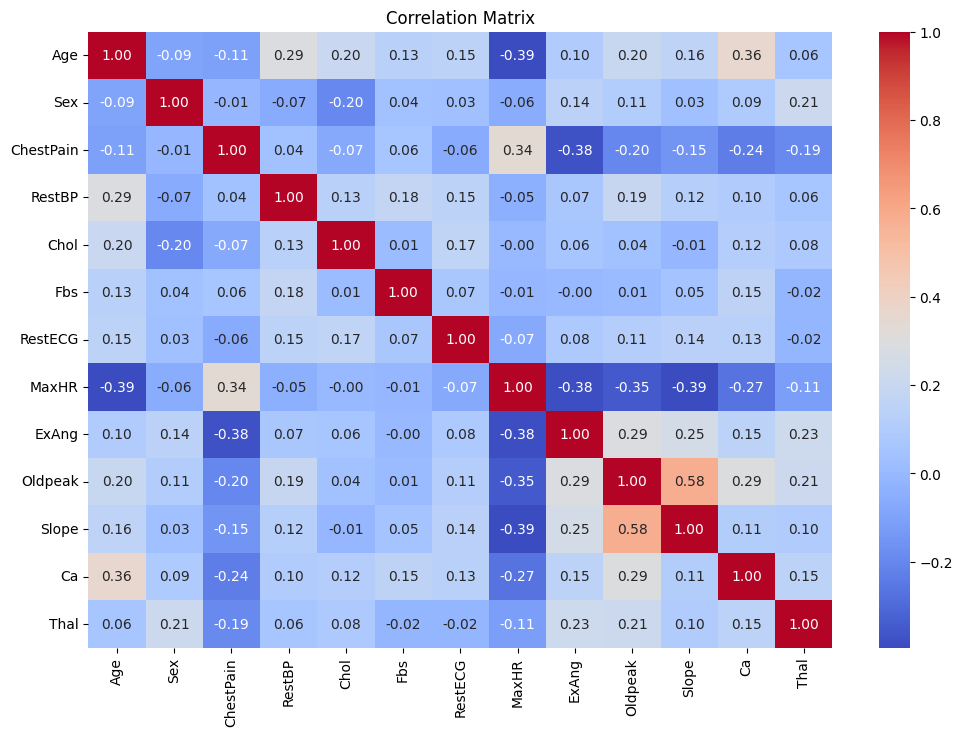

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()